In [1]:
import pandas as pd
data = pd.read_csv("../data/shot_features.csv", index_col="Unnamed: 0")
data.loc[data["shot_outcome"] == "goal", "shot_outcome"] = 1
data.loc[data["shot_outcome"] != 1, "shot_outcome"] = 0

In [2]:
print(data.head())
print(data.info())
print(data.describe())

    body_part       type_of_play  first_touch created_oppertunity  \
0        head       regular_play         True            assisted   
1  right_foot  crossed_free_kick        False            assisted   
2   left_foot       regular_play         True            assisted   
3  right_foot        corner_kick        False     individual_play   
4        head        corner_kick         True            assisted   

   ball_goal_distance  ball_gk_distance  shot_angle  gk_angle  \
0            6.045246          3.515110   58.247386  0.342153   
1           10.749530          8.302199   35.893673  0.371793   
2           13.706356         10.824047   26.319804  0.951763   
3           31.397250         29.174856   11.273399  0.758140   
4            9.934526          9.208024   39.541235  0.976594   

   pressure_on_ball  n_obstructive_players shot_outcome  
0         43.779802                    1.0            0  
1         35.222179                    4.0            0  
2         81.018753 

In [3]:
print(data["body_part"].value_counts())
data["is_by_foot"] = 0
data.loc[data["body_part"].isin(["right_foot", "left_foot"]), "is_by_foot"] = 1
print(data["is_by_foot"].value_counts())
data.drop(columns=["body_part"], inplace=True)

body_part
right_foot    7884
left_foot     5160
head          2820
other           55
Name: count, dtype: int64
is_by_foot
1    13044
0     2875
Name: count, dtype: int64


In [4]:
print(data["type_of_play"].value_counts())
data = pd.get_dummies(data, columns=["type_of_play"])
print(data.columns)

type_of_play
regular_play         11289
corner_kick           2635
crossed_free_kick      856
free_kick              539
counter_attack         480
penalty                120
Name: count, dtype: int64
Index(['first_touch', 'created_oppertunity', 'ball_goal_distance',
       'ball_gk_distance', 'shot_angle', 'gk_angle', 'pressure_on_ball',
       'n_obstructive_players', 'shot_outcome', 'is_by_foot',
       'type_of_play_corner_kick', 'type_of_play_counter_attack',
       'type_of_play_crossed_free_kick', 'type_of_play_free_kick',
       'type_of_play_penalty', 'type_of_play_regular_play'],
      dtype='object')


In [5]:
print(data["created_oppertunity"].value_counts())
data.drop(columns=["created_oppertunity"], inplace=True)

created_oppertunity
assisted           9304
individual_play    4552
regular_play       2063
Name: count, dtype: int64


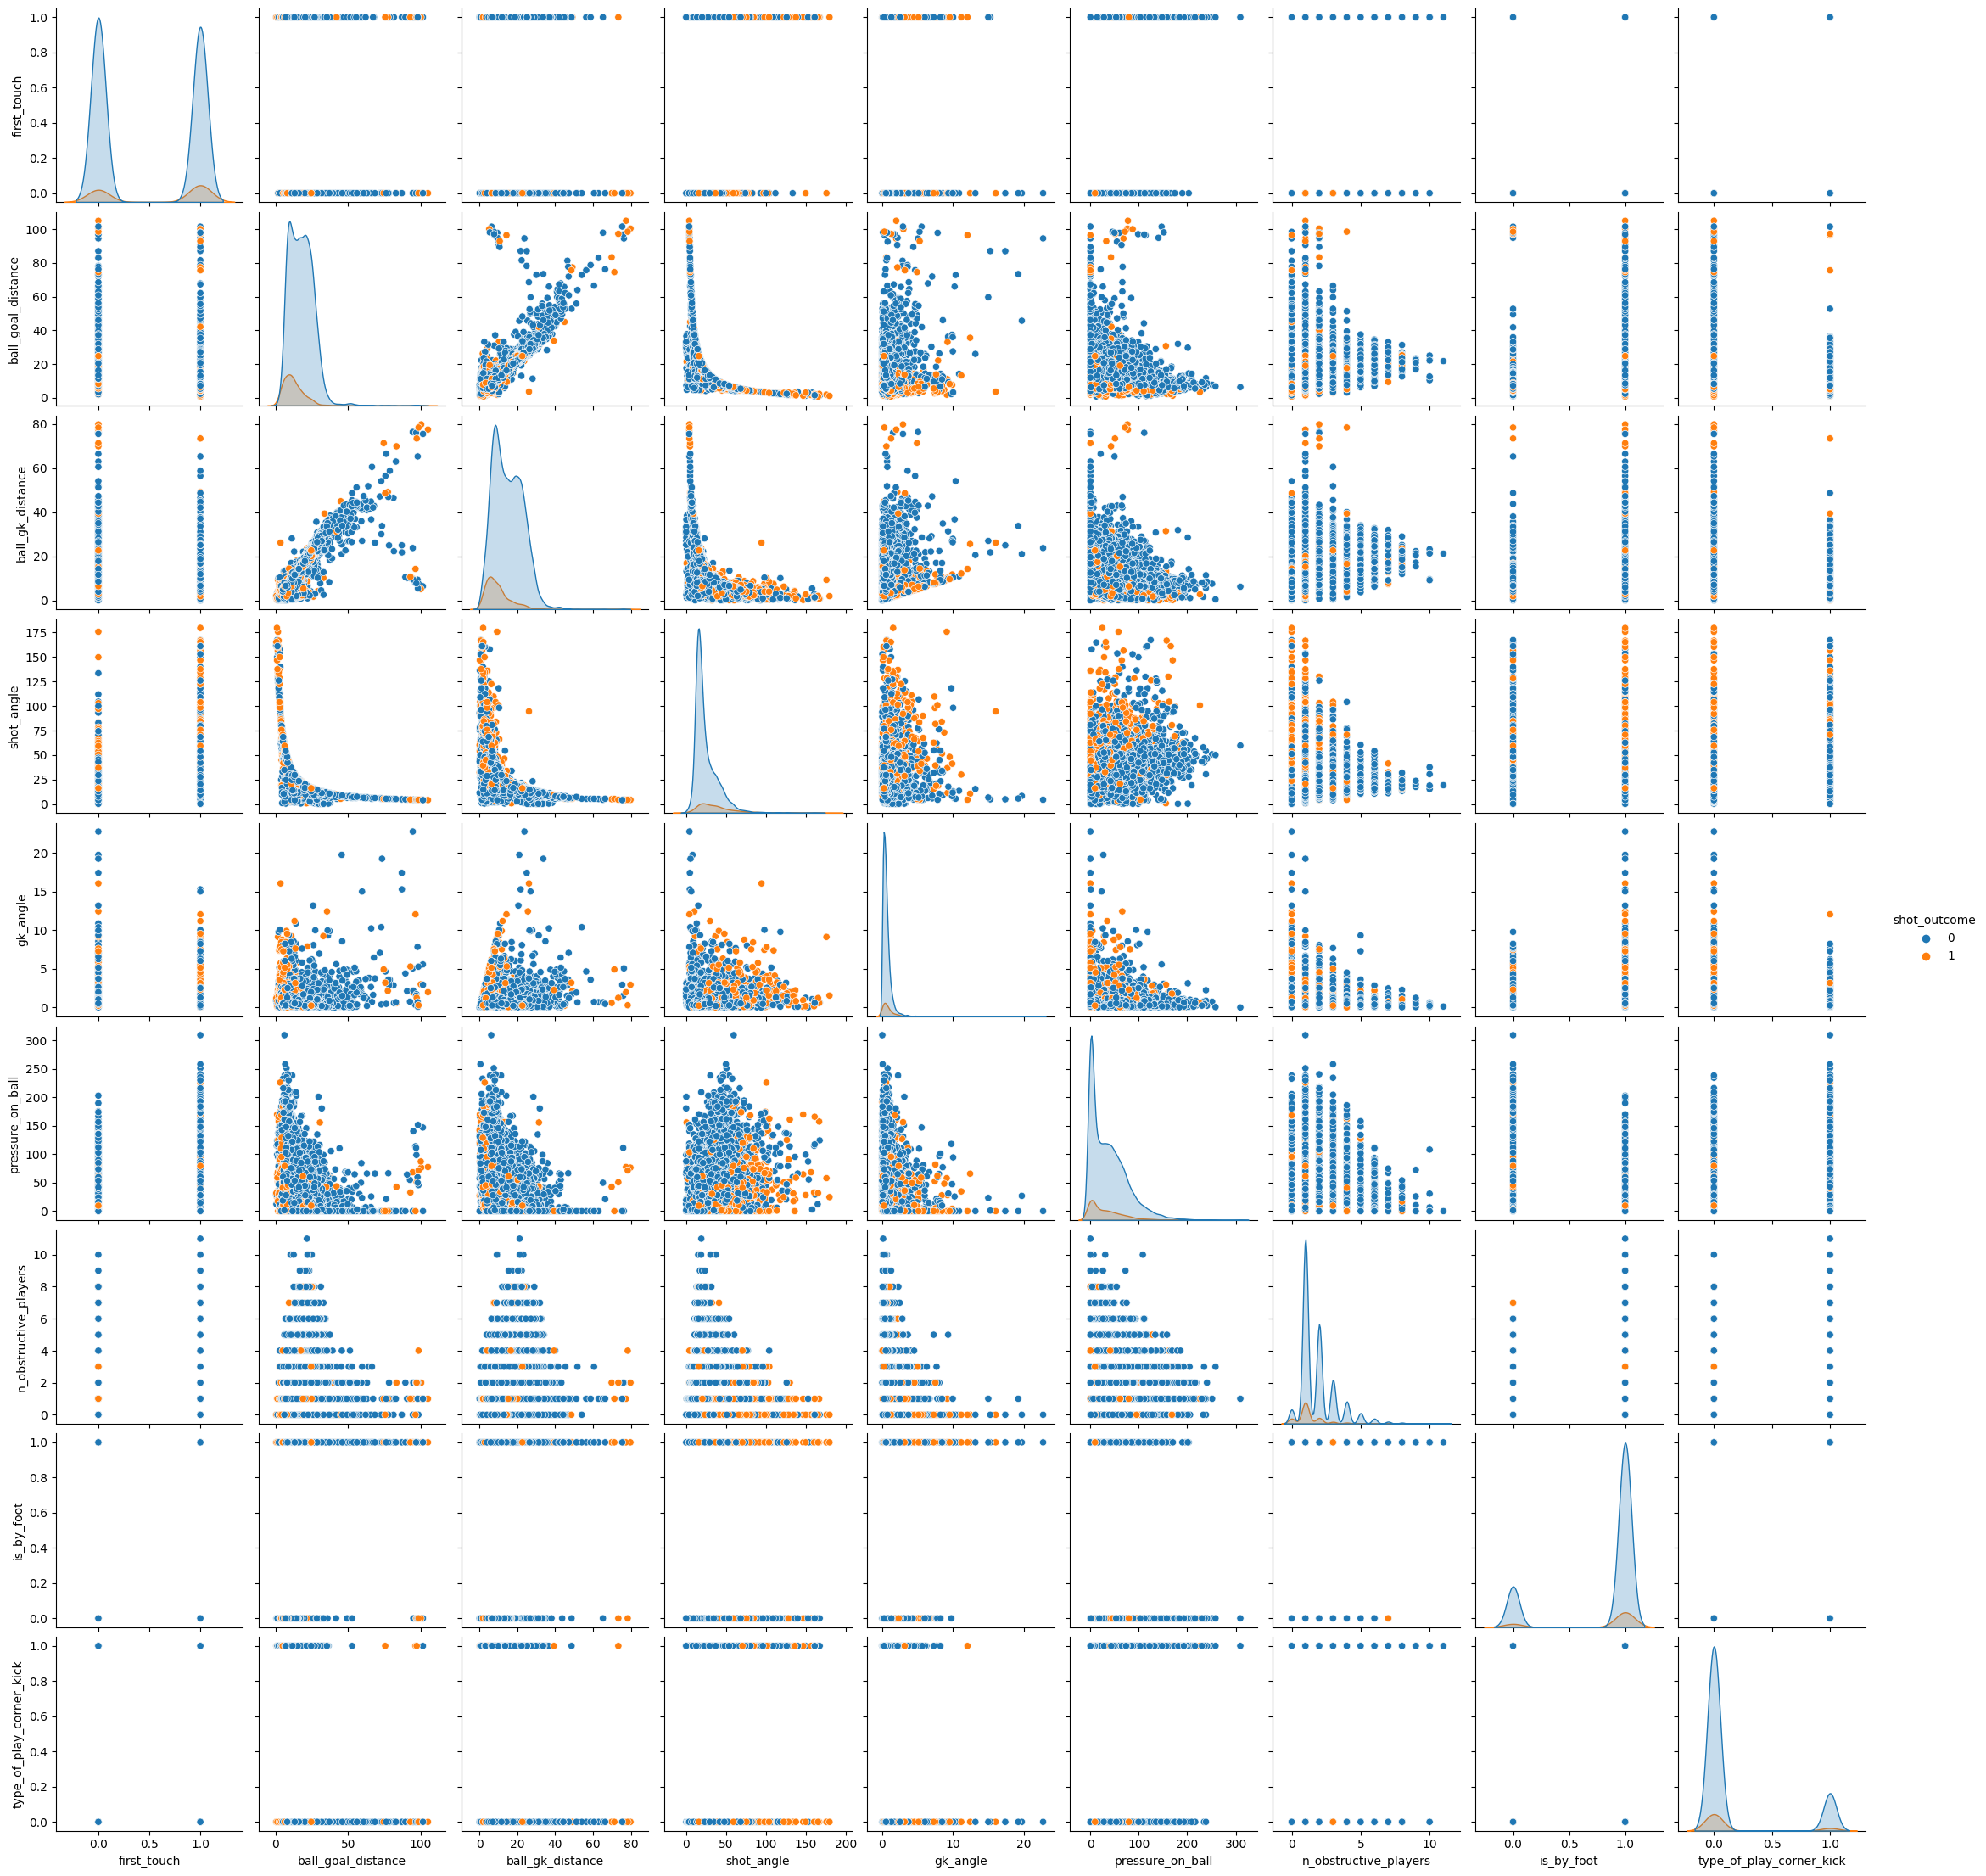

In [8]:
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore", category=FutureWarning)
sns.pairplot(data.iloc[:, :10], hue="shot_outcome")
plt.show()

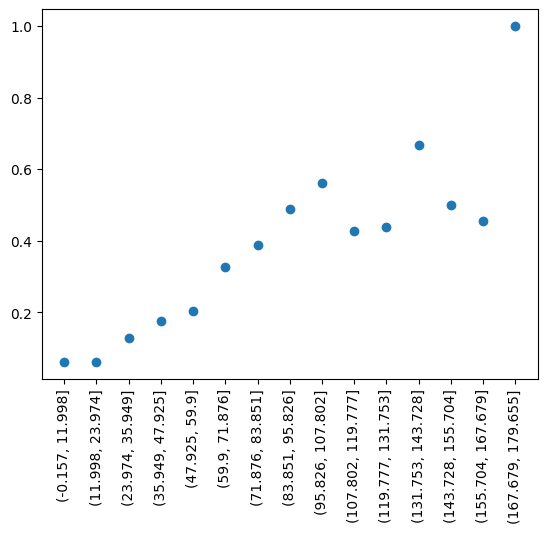

In [24]:
bins = pd.cut(data["shot_angle"], bins=15)

mean_success_rate = data["shot_outcome"].groupby(bins).mean()
plt.scatter([str(interval) for interval in mean_success_rate.index], mean_success_rate.values)
plt.xticks(rotation=90)
plt.show()

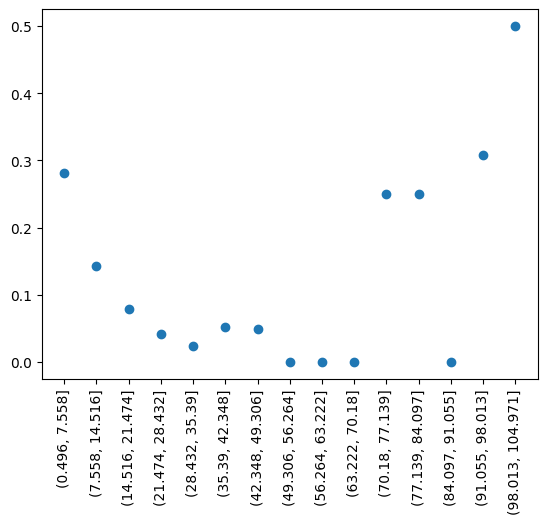

In [26]:
bins = pd.cut(data["ball_goal_distance"], bins=15)

mean_success_rate = data["shot_outcome"].groupby(bins).mean()
plt.scatter([str(interval) for interval in mean_success_rate.index], mean_success_rate.values)
plt.xticks(rotation=90)
plt.show()

In [29]:
data[data["ball_goal_distance"] > 50]


,first_touch,ball_goal_distance,ball_gk_distance,shot_angle,gk_angle,pressure_on_ball,n_obstructive_players,shot_outcome,is_by_foot,type_of_play_corner_kick,type_of_play_counter_attack,type_of_play_crossed_free_kick,type_of_play_free_kick,type_of_play_penalty,type_of_play_regular_play
12,False,63.891829,51.799792,6.554913,0.676407,0.000000,3.0,0,1,False,False,False,True,False,False
9,True,52.380645,36.214645,7.993782,0.400259,0.000000,2.0,0,1,False,False,False,False,False,True
22,False,52.006600,40.469377,7.603571,0.186299,0.000000,3.0,0,1,False,False,False,False,False,True
21,True,75.713106,56.424616,5.164839,4.657627,0.000000,1.0,0,1,False,False,False,False,False,True
13,False,63.063327,40.908398,6.621859,1.132550,2.654020,2.0,0,1,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,False,52.506428,42.635109,6.742402,2.630164,0.000000,0.0,0,1,False,False,False,True,False,False
18,False,60.779596,47.272031,6.318723,1.225109,0.000000,1.0,0,1,False,False,False,False,False,True
23,False,68.533771,26.087426,6.104690,3.755582,66.068806,0.0,0,1,False,False,False,False,False,True
12,False,53.699663,44.266254,7.017954,2.645696,0.000000,0.0,0,1,False,False,False,False,False,True
